In [136]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import label_binarize
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [151]:
def ROC_curve(y_test,y_score):
    fpr = dict()
    tpr = dict()
    thresholds = dict()
    roc_auc = dict()
    n_classes = ['ResNet10','ResNet50','VGG16','CNN-LSTM']
    for i in range(len(n_classes)):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
    lw = 2
    for i, color in zip(range(len(n_classes)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of {0} (area = {1:0.2f})'
                 ''.format(n_classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr,tpr,thresholds

In [152]:
ResNet18 = pd.read_csv('Pre_ResNet_18.csv')
ResNet50 = pd.read_csv('Pre_ResNet_50.csv')
VGG16 = pd.read_csv('Pre_VGG_16.csv')
CNN_LSTM = pd.read_csv('Pre_CNN_LSTM.csv')

ResNet18.head()

,True or False,sample 1,sample 2,pre,score
0,1,id10270/x6uYqmx31kE/00001.wav,id10270/8jEAjG6SegY/00008.wav,1,0.832304
1,0,id10270/x6uYqmx31kE/00001.wav,id10300/ize_eiCFEg0/00003.wav,0,0.000534
2,1,id10270/x6uYqmx31kE/00001.wav,id10270/GWXujl-xAVM/00017.wav,1,0.997565
3,0,id10270/x6uYqmx31kE/00001.wav,id10273/0OCW1HUxZyg/00001.wav,0,0.000302
4,1,id10270/x6uYqmx31kE/00001.wav,id10270/8jEAjG6SegY/00022.wav,1,0.992823


In [153]:
ResNet18_true = ResNet18['True or False'].values
ResNet18_score = ResNet18['score'].values
ResNet18_true = np.expand_dims(np.array(ResNet18_true),1)
ResNet18_score = np.expand_dims(np.array(ResNet18_score),1)

ResNet50_true = ResNet50['True or False'].values
ResNet50_score = ResNet50['score'].values
ResNet50_true = np.expand_dims(np.array(ResNet50_true),1)
ResNet50_score = np.expand_dims(np.array(ResNet50_score),1)

VGG16_true = VGG16['True or False'].values
VGG16_score = VGG16['score'].values
VGG16_true = np.expand_dims(np.array(VGG16_true),1)
VGG16_score = np.expand_dims(np.array(VGG16_score),1)

CNN_LSTM_true = CNN_LSTM['True or False'].values
CNN_LSTM_score = CNN_LSTM['score'].values
CNN_LSTM_true = np.expand_dims(np.array(CNN_LSTM_true),1)
CNN_LSTM_score = np.expand_dims(np.array(CNN_LSTM_score),1)

In [154]:
true_array = np.hstack((ResNet18_true,ResNet50_true,VGG16_true,CNN_LSTM_true))
score_array = np.hstack((ResNet18_score,ResNet50_score,VGG16_score,CNN_LSTM_score))

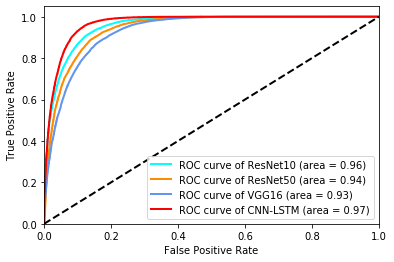

In [155]:
fpr,tpr,thresholds = ROC_curve(true_array,score_array)

In [142]:
def compute_eer(fpr,tpr,thresholds):
    """ Returns equal error rate (EER) and the corresponding threshold. """
    fnr = 1-tpr
    abs_diffs = np.abs(fpr - fnr)
    min_index = np.argmin(abs_diffs)
    eer = np.mean((fpr[min_index], fnr[min_index]))
    return eer, thresholds[min_index]

In [143]:
for i in range(4):
    print(compute_eer(fpr[i],tpr[i],thresholds[i]))

(0.11222780463417037, 0.6537785)
(0.12908457584368818, 0.5606151999999999)
(0.14668581013501442, 0.6515613)
(0.08867086568837729, 0.75673693)


In [144]:
ResNet18_true = ResNet18['True or False'].values
ResNet18_pre = ResNet18['pre'].values

In [145]:
len(np.where(ResNet18_true != ResNet18_pre)[0])/len(ResNet18_true)

0.10932971736991838

In [146]:
def acc(df):
    true = df['True or False'].values
    pre = df['pre'].values
    wrong = len(np.where(true != pre)[0])
    accuracy = 1-( wrong/len(true) )
    return accuracy

In [147]:
acc(ResNet18)

0.8906702826300816

In [148]:
acc(ResNet50)

0.8743984472627688

In [149]:
acc(VGG16)

0.8552551115365186

In [150]:
acc(CNN_LSTM)

0.9168062534896706